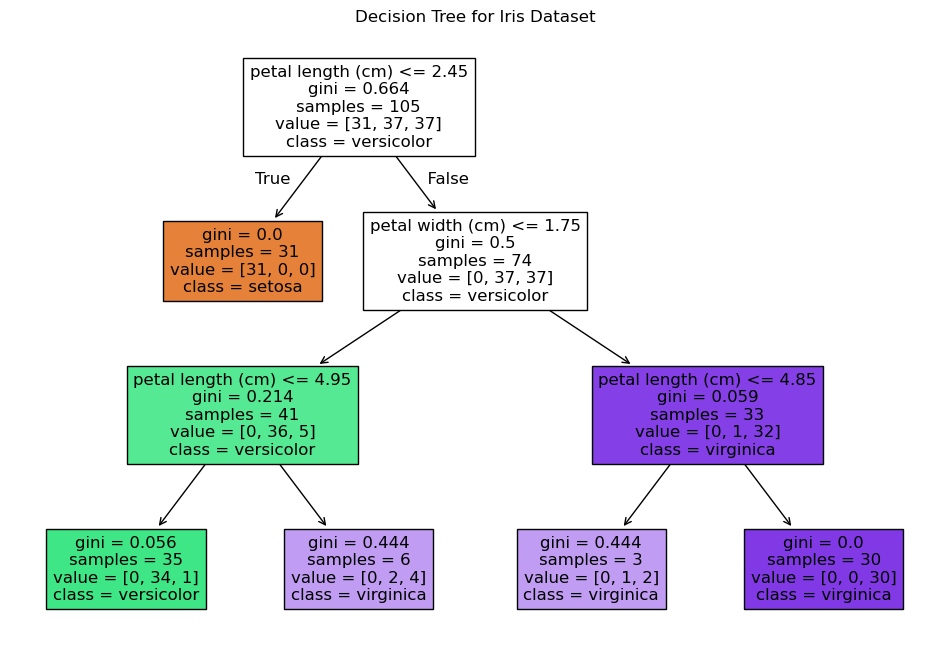

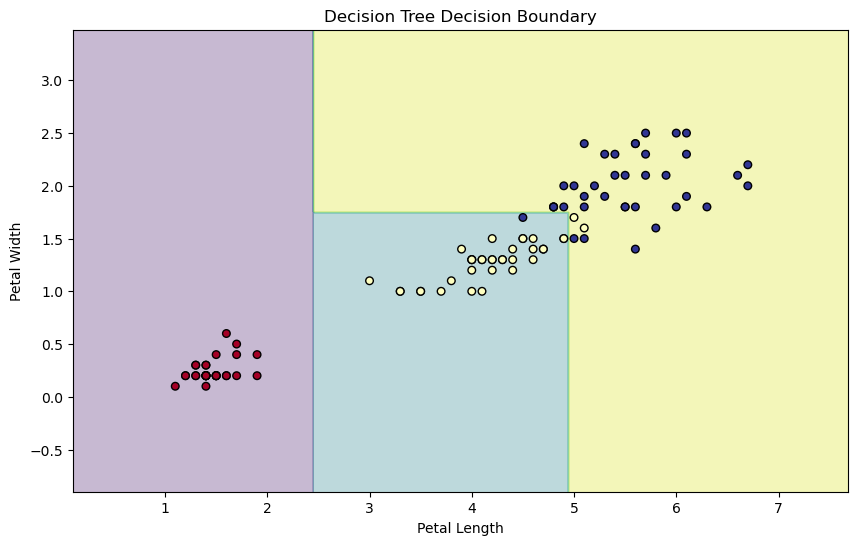

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # Petal length and petal width (for 2D visualization)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 2: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

# Step 3: Plot Decision Boundaries
def plot_decision_boundary(clf, X, y, axes, title):
    # Generate a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict classes for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    axes.contourf(xx, yy, Z, alpha=0.3)
    axes.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor="k", marker="o", cmap=plt.cm.RdYlBu)
    axes.set_xlim(xx.min(), xx.max())
    axes.set_ylim(yy.min(), yy.max())
    axes.set_title(title)

# Visualize the decision boundary
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(clf, X_train, y_train, ax, "Decision Tree Decision Boundary")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
